In [1]:
##Import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import matplotlib.ticker as ticker
import datetime
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import LogLocator
from matplotlib.ticker import LogLocator
import matplotlib.ticker as mtick


In [2]:
#Import XRF data and print the first five rows
XRF = pd.read_excel(r"C:\Ben\Ben\Teaching\python\XRF-data example SVAP117_1av3.xls")
XRF.head()

,Depth (cm),Si,S,K,Ca,Ti,Mn,Fe,Rb,Sr,Zr,Mo inc,Mo coh
0,0.00,27,5,209,646,290,148,9896,121,174,380,25390,3941
1,0.05,34,21,225,609,261,99,9762,57,147,571,24739,3927
2,0.10,0,0,174,624,235,105,9581,139,239,397,25070,3780
3,0.15,51,10,190,629,281,135,9818,61,250,373,24890,4074
4,0.20,19,26,196,588,360,168,9456,62,283,452,24778,3950


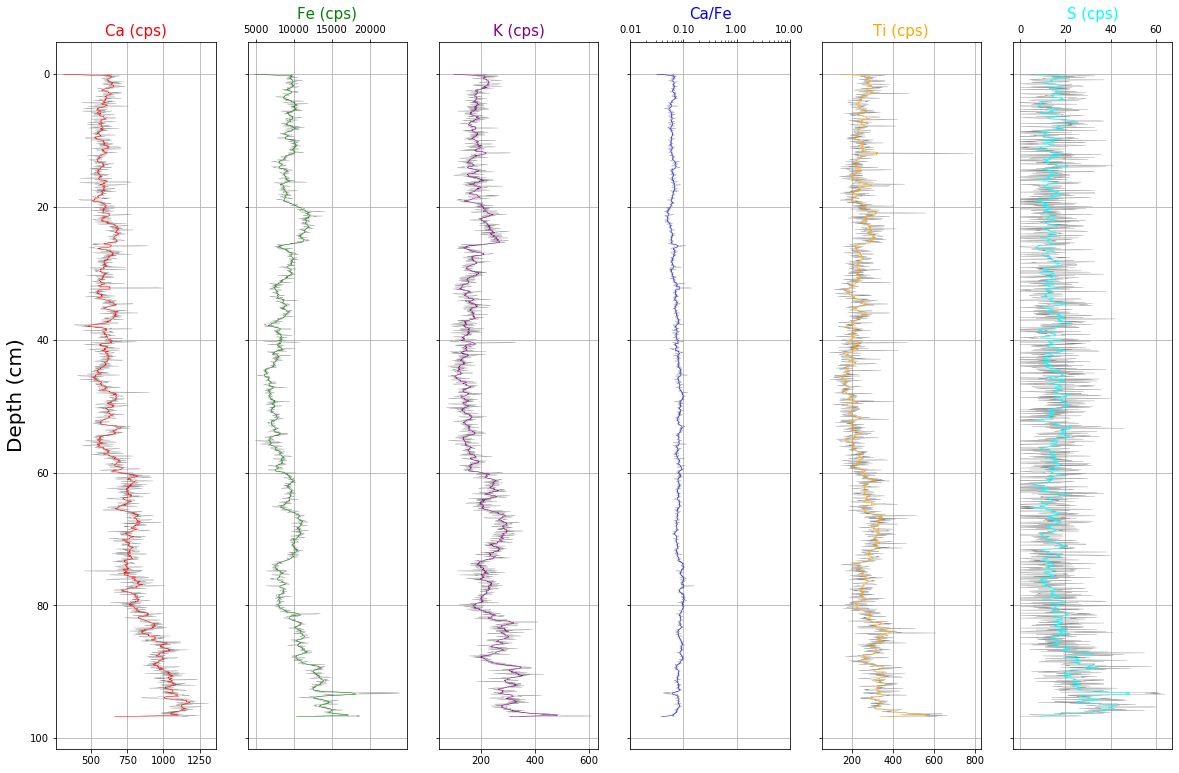

In [6]:

#Create figure with six subplots (6 rows, one column)

fig, ((ax1, ax2, ax3, ax4, ax5, ax6)) = plt.subplots(1, 6, figsize = (20,13), sharex=False, sharey=True)


#Compute Ratio between Ca and Fe
XRF['Ca/Fe'] = XRF['Ca']/XRF['Fe']

#Compute moving average of Ti. Once you have defined this, you can create a new dataset with a moving average, as seen below
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')


XRF['Ca_average'] = movingaverage(XRF['Ca'], 10)
XRF['Fe_average'] = movingaverage(XRF['Fe'], 10)
XRF['K_average'] = movingaverage(XRF['K'], 10)
XRF['Ca/Fe_average'] = movingaverage(XRF['Ca/Fe'], 10)
XRF['Ti_average'] = movingaverage(XRF['Ti'], 10)
XRF['S_average'] = movingaverage(XRF['S'], 10)



#Plot the data in each subplot. Note how instead of setting the thickness for each element we are plotting, we are defining our thickness as a variable. Then we can just change one value and update all 6 plots.
line_thickness = 0.3

ax1.plot( 'Ca', 'Depth (cm)', data=XRF, color='grey', linewidth=line_thickness)
ax2.plot( 'Fe', 'Depth (cm)', data=XRF, color='grey', linewidth=line_thickness)
ax3.plot( 'K', 'Depth (cm)', data=XRF, color='grey', linewidth=line_thickness)
ax4.plot( 'Ca/Fe', 'Depth (cm)', data=XRF, color='grey', linewidth=line_thickness)
ax5.plot( 'Ti', 'Depth (cm)', data=XRF, color='grey', linewidth=line_thickness)
ax6.plot( 'S', 'Depth (cm)', data=XRF, color='grey', linewidth=line_thickness)

#Plot moving average values in a thicker line. Note how instead of setting the thickness for each element we are plotting, we are defining our thickness as a variable. Then we can just change one value and update all 6 plots.
moving_average_line_thickness = 0.5

ax1.plot( 'Ca_average', 'Depth (cm)', data=XRF, color='red', linewidth=moving_average_line_thickness)
ax2.plot( 'Fe_average', 'Depth (cm)', data=XRF, color='green', linewidth=moving_average_line_thickness)
ax3.plot( 'K_average', 'Depth (cm)', data=XRF, color='purple', linewidth=moving_average_line_thickness)
ax4.plot( 'Ca/Fe_average', 'Depth (cm)', data=XRF, color='blue', linewidth=moving_average_line_thickness)
ax5.plot( 'Ti_average', 'Depth (cm)', data=XRF, color='orange', linewidth=moving_average_line_thickness)
ax6.plot( 'S_average', 'Depth (cm)', data=XRF, color='cyan', linewidth=moving_average_line_thickness)

#Set some of the plots to have the x-axis at the top of the figure
ax2.xaxis.tick_top()
ax4.xaxis.tick_top()
ax6.xaxis.tick_top()

#Change one of the plots to have a logarthmic scale
ax4.set_xscale('log')
ax4.set_xticks([0.01, 0.1, 1, 10]) #Here you define the intervals you want to plot on a logarithmic scale axix
ax4.get_xaxis().set_major_formatter(mtick.ScalarFormatter()) #If you want to plot your logarthmic scale axis in the scientific style (1x10^^2) for example, remove this line

#Add titles to the subplots
ax1.set_title("Ca (cps)", fontsize = 15, color='red')
ax2.set_title("Fe (cps)", fontsize = 15, color='green')
ax3.set_title("K (cps)", fontsize = 15, color='purple')
ax4.set_title("Ca/Fe", fontsize = 15, color='blue')
ax5.set_title("Ti (cps)", fontsize = 15, color='orange')
ax6.set_title("S (cps)", fontsize = 15, color='cyan')

#Add grids
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
ax6.grid()

#Add Y label. (Notice that it is shared between all the plots). We will also invert the Y-axis so that depth is increasing
ax1.set_ylabel('Depth (cm)' , fontsize=20)
ax1.invert_yaxis()

#Save figure
plt.savefig("XRF_data.png", dpi=300)
